In [13]:
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import os
import bilby

In [14]:
events_config = [
    {
        'name': 'GW150914',
        'durations': np.array([114, 57]),
    },
    {
        'name': 'GW231226',
        'durations': np.array([145, 72]),
    },
    {
        'name': 'GW250114',
        'durations': np.array([58]),
    }
]

# SNR && amplitude dimensionless

In [ ]:
def draw_horizontal_split_violin_fixed_SNR(ax, data_t, data_b, pos, color_t, color_b,
                                       bins_t=50, bins_b=50, bandwidth_t='scott', bandwidth_b='scott',
                                    #    event_labelloc_t=1, event_labelloc_b=1
                                       ):
    datasets = [data_t, data_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.5]
    # event_labellocs = [event_labelloc_t, event_labelloc_b]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    # for data, data_event, side, color, bins, bandwidth, height, event_labelloc in zip(datasets, data_events, sides, colors, bins_all, bandwidths, heights, event_labellocs):
    for data,  side, color, bins, bandwidth, height in zip(datasets,  sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.3 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        upper_val = np.percentile(data,90)
        ax.vlines(upper_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 2
        offset_y = -1 * side * 0.15
        ax.text(
            x=upper_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{upper_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6)


In [ ]:

def draw_horizontal_split_violin_fixed_amp(ax, data_t, data_b, pos, color_t, color_b,
                                       bins_t=50, bins_b=50, bandwidth_t='scott', bandwidth_b='scott',
                                    #    event_labelloc_t=1, event_labelloc_b=1
                                       ):
    datasets = [data_t, data_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.5]
    # event_labellocs = [event_labelloc_t, event_labelloc_b]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    # for data, data_event, side, color, bins, bandwidth, height, event_labelloc in zip(datasets, data_events, sides, colors, bins_all, bandwidths, heights, event_labellocs):
    for data,  side, color, bins, bandwidth, height in zip(datasets,  sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.4 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        upper_val = np.percentile(data,90)
        if upper_val>2:
            print("upper_val too large:",upper_val)
            continue
        ax.vlines(upper_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 0.06
        offset_y = -1 * side * 0.15
        ax.text(
            x=upper_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{upper_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6)


In [17]:
# background_file_list = []
event_file_json_list = []
labellist = []
colorlist = []

for event in events_config:
    event_name = event['name']
    for duration in event['durations']:
        path_pattern_background = f"./SNR_csv/event_snr/{event_name}*{duration}*_result.json"
        matched_files_event = glob(path_pattern_background)

        matched_files_event.sort()


        for file_path in matched_files_event:
            event_file_json_list.append(file_path)
            label = f"{event_name}\n{duration}s"
            if label not in labellist:
                labellist.append(label)
            if 'new' in file_path:
                colorlist.append('C0')
            else:
                colorlist.append('C1')


upper_val too large: 3.6872688255678567


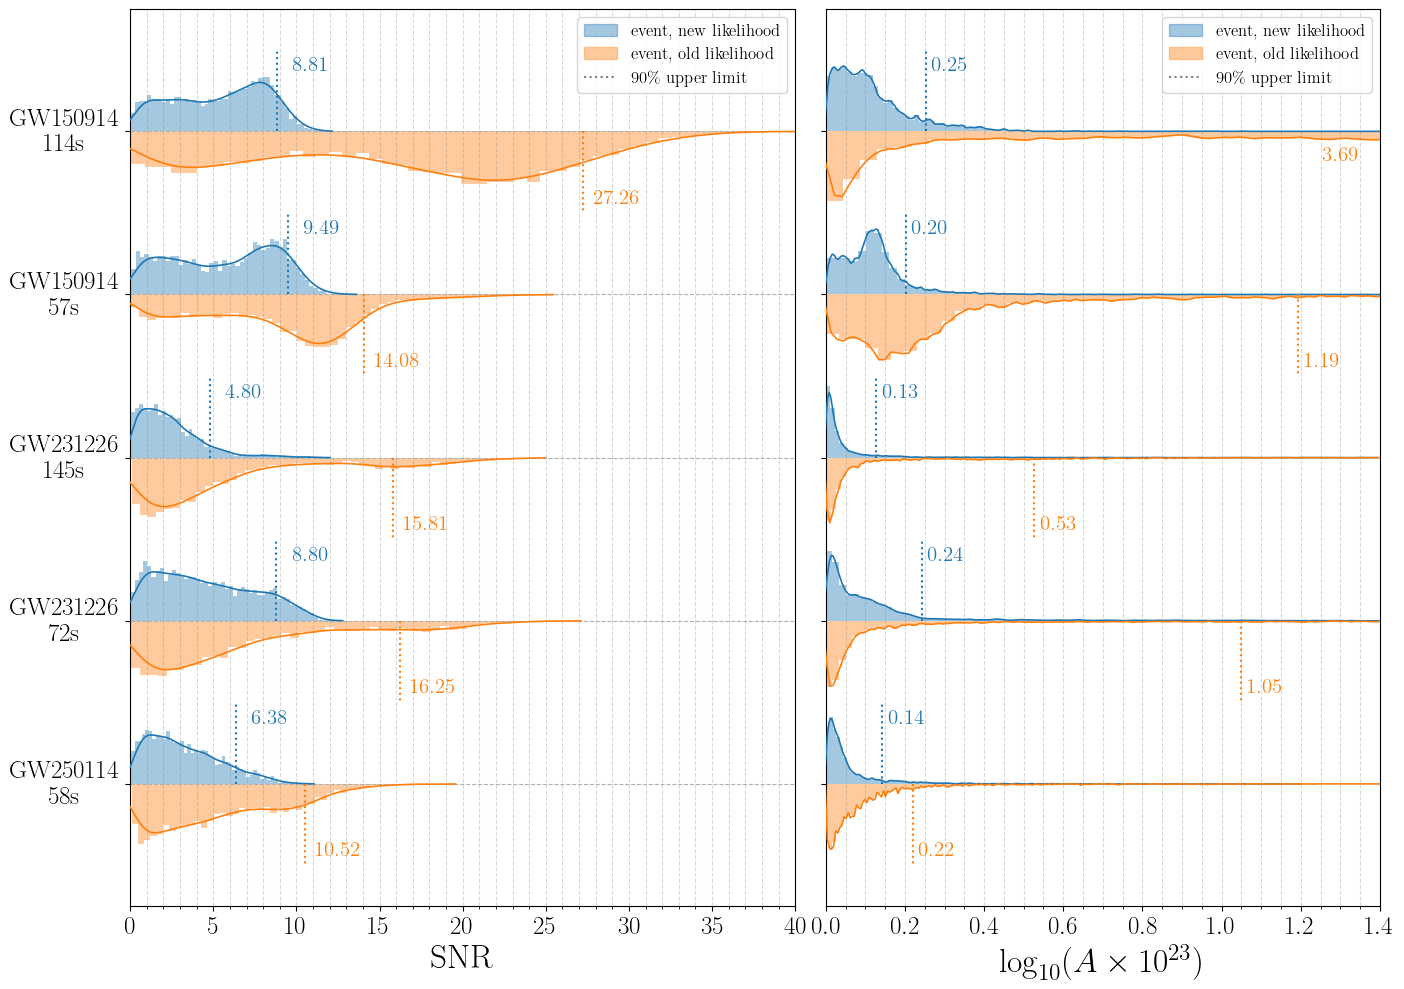

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
num_pairs = 5
from matplotlib.ticker import FixedLocator


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2 * num_pairs),
                               gridspec_kw={'width_ratios': [1.2, 1]})

y_pos_base = num_pairs


for i in [0, 2, 4, 6, 8]:
    index_new = i
    index_old = i + 1
    current_y = y_pos_base - (i // 2)

    draw_horizontal_split_violin_fixed_SNR(
        ax1,
        bilby.result.read_in_result(event_file_json_list[index_new]).posterior['SNR'],
        bilby.result.read_in_result(event_file_json_list[index_old]).posterior['SNR'],
        pos=current_y,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.2, bandwidth_b=0.2,
    )


    data_new = bilby.result.read_in_result(event_file_json_list[index_new]).posterior['amplitude']*bilby.result.read_in_result(event_file_json_list[index_new]).posterior['width']
    data_old = bilby.result.read_in_result(event_file_json_list[index_old]).posterior['amplitude']*bilby.result.read_in_result(event_file_json_list[index_old]).posterior['width']
    data_new = data_new*1e23
    data_old = data_old*1e23
    draw_horizontal_split_violin_fixed_amp(
        ax2,
        data_new,
        data_old,
        # pd.read_csv(event_file_list[index_new])["amplitude_dimensionless"],
        # pd.read_csv(event_file_list[index_old])["amplitude_dimensionless"],
        pos=current_y,
        bins_t=80, bins_b=200,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.05, bandwidth_b=0.01,
        # event_labelloc_t=event_labelloc_list[index_new], event_labelloc_b=event_labelloc_list[index_old]
    )
    current_y -= 1

ax2.text(
    x=1.3,
    y=5 + (-1) * 0.5 + 0.3,
    s=f"{3.6872:.2f}",
    color='C1',
    fontsize=15,
    # fontweight='bold',
    ha='center',
    va='bottom',
    zorder=6)

ax1.set_xlim(0, 40)
ax1.set_yticks(range(1, num_pairs + 1))
ax1.grid(axis='y', linestyle='--', alpha=1)
ax1.xaxis.set_minor_locator(FixedLocator(np.arange(0, 40, 1)))

ax1.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)
ax1.set_yticklabels(labellist[::-1], fontsize=18, ha='right', va='center')

for label in ax1.get_yticklabels():
    label.set_multialignment('center')
ax1.set_xlabel(r'SNR', fontsize=24)

# ax2.set_yticks(range(1, num_pairs + 1))
ax2.xaxis.set_minor_locator(FixedLocator(np.arange(0,4,0.05)))
ax2.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)

ax2.set_yticklabels(())
ax2.set_xlabel(r'$\log_{10}(A\times 10^{23})$',fontsize = 24)
ax2.set_xlim(0, 1.4)

patch1 = mpatches.Patch(color='C0', alpha=0.4, label='event, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='event, old likelihood')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label=r'90\% upper limit')

ax1.legend(handles=[patch1, patch2, line1], loc='upper right', fontsize=12)
ax2.legend(handles=[patch1, patch2, line1], loc='upper right', fontsize=12)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=18)


plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

plt.savefig("combined_event_plot.pdf")
plt.show()